## Dataset overview and EDA

In [19]:
import pandas as pd
df = pd.read_csv("data/arabic_english_sentences.csv")
df.head()




,Arabic,English,Type
0,الأمل يضيء حياتنا.,Hope lights our lives.,Inspirational Sentences
1,لا تترك الفرص تفوتك بسبب الخوف.,Don’t let fear prevent you from seizing opport...,Inspirational Sentences
2,عندما تؤمن بنفسك، فإنك تصنع فرصًا جديدة.,"When you believe in yourself, you create new o...",Inspirational Sentences
3,إذا كانت لديك الرغبة، فلا شيء يمكن أن يمنعك.,"If you have the will, nothing can stop you.",Inspirational Sentences
4,كل صباح هو فرصة جديدة لتكون أفضل.,Every morning is a new chance to be better.,Inspirational Sentences


In [20]:
df.info()
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Arabic   25000 non-null  object
 1   English  25000 non-null  object
 2   Type     25000 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB
(25000, 3)
Index(['Arabic', 'English', 'Type'], dtype='object')


In [21]:
print(df.isnull().sum())
print(df.duplicated().sum())

Arabic     0
English    0
Type       0
dtype: int64
0


In [22]:
df["len_en"] = df["English"].str.split().apply(len)
df["len_ar"] = df["Arabic"].str.split().apply(len)
df[["len_en", "len_ar"]].describe()



,len_en,len_ar
count,25000.000000,25000.000000
mean,9.648320,8.346600
std,2.948211,2.517602
min,2.000000,2.000000
25%,8.000000,7.000000
50%,10.000000,8.000000
75%,11.000000,10.000000
max,25.000000,19.000000


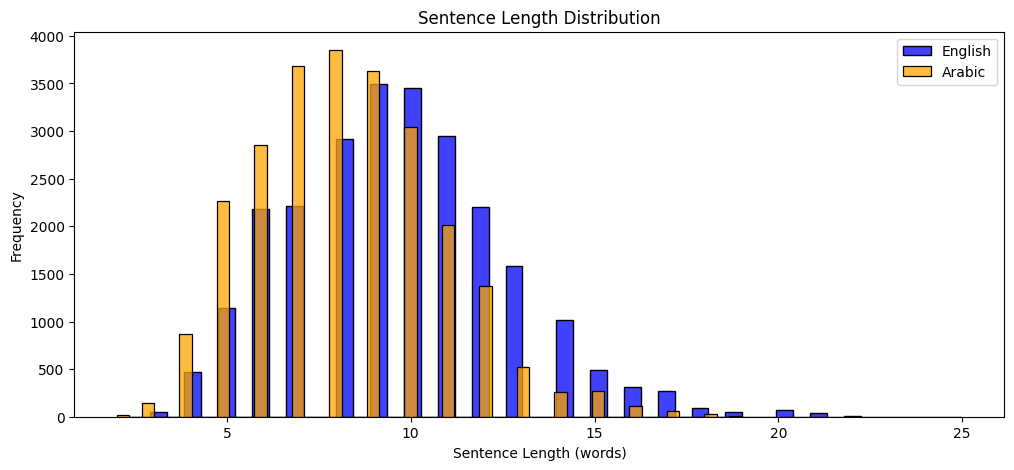

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.histplot(df['len_en'], bins=50, kde=False, color='blue', label='English')
sns.histplot(df['len_ar'], bins=50, kde=False, color='orange', label='Arabic')
plt.legend()
plt.title("Sentence Length Distribution")
plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.show()

In [24]:
# English vocab
vocab_en = set(" ".join(df['English']).split())
# Arabic vocab
vocab_ar = set(" ".join(df['Arabic']).split())

print(f"English vocabulary size: {len(vocab_en)}")
print(f"Arabic vocabulary size: {len(vocab_ar)}")


English vocabulary size: 9533
Arabic vocabulary size: 16185


In [25]:
total_tokens_en = df['len_en'].sum()
total_tokens_ar = df['len_ar'].sum()

print(f"Total English tokens: {total_tokens_en}")
print(f"Total Arabic tokens: {total_tokens_ar}")
print(f"Average tokens per sentence. EN: {total_tokens_en/len(df):.2f}, AR: {total_tokens_ar/len(df):.2f}")


Total English tokens: 241208
Total Arabic tokens: 208665
Average tokens per sentence. EN: 9.65, AR: 8.35


In [26]:
from collections import Counter
import re

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# English
all_en_tokens = [w for sent in df['English'] for w in tokenize(sent)]
en_freq = Counter(all_en_tokens).most_common(20)

# Arabic 
all_ar_tokens = [w for sent in df['Arabic'] for w in sent.split()]
ar_freq = Counter(all_ar_tokens).most_common(20)

print("Top English terms:", en_freq)
print("Top Arabic terms:", ar_freq)


Top English terms: [('the', 10372), ('to', 8412), ('you', 7279), ('i', 5186), ('a', 5009), ('in', 4754), ('is', 4312), ('this', 4232), ('be', 3870), ('if', 3727), ('of', 3000), ('what', 2763), ('will', 2723), ('more', 2692), ('would', 2090), ('your', 2032), ('do', 1972), ('we', 1946), ('life', 1882), ('with', 1769)]
Top Arabic terms: [('من', 8227), ('في', 7494), ('أن', 6490), ('أكثر', 2957), ('على', 2780), ('هذه', 2480), ('إلى', 2367), ('هو', 2334), ('لو', 2011), ('الذي', 1850), ('ما', 1845), ('هل', 1824), ('لكانت', 1807), ('إذا', 1721), ('كنت', 1645), ('تم', 1436), ('تحسين', 1415), ('الشخص', 1301), ('لا', 1271), ('أعتقد', 1254)]


In [27]:
# Ratio of Arabic length to English length
df['len_ratio'] = df['len_ar'] / df['len_en']

# Define thresholds (you can adjust)
lower_threshold = 0.5   # Arabic less than half the English length
upper_threshold = 2.0   # Arabic more than double the English length

mismatched = df[(df['len_ratio'] < lower_threshold) | (df['len_ratio'] > upper_threshold)]

print(f"Total mismatched pairs: {len(mismatched)} out of {len(df)}")
mismatched.sample(10)  # Show random 10 for review


Total mismatched pairs: 29 out of 25000


,Arabic,English,Type,len_en,len_ar,len_ratio
23488,متى ستعود؟,When will you be back?,Everyday Expressions,5,2,0.400000
16618,إذا كنت تؤمن بمستقبلك، ستتمكن من بناءه بيديك.,"If you believe in your future, you will be abl...",Conditional Sentences,17,8,0.470588
15288,من فضلك، قم بتفعيل خيار التحقق عبر البريد الإل...,Please enable email verification.,Commands / Requests,4,9,2.250000
20370,الرحلة تستغرق ساعة ونصف.,The trip will take an hour and a half.,Time and Quantity Sentences,9,4,0.444444
11116,كيف تعتني بصحتك النفسية؟,How do you take care of your mental health?,Questions,9,4,0.444444
11163,ما أروع أن نعيش اللحظة ونستمتع بها!,What a joy it is to live in the moment and enj...,Exclamatory Sentences,15,7,0.466667
20279,يستغرق تجميع المعدات ساعة.,It takes about an hour to gather the equipment.,Time and Quantity Sentences,9,4,0.444444
94,العمل اليوم هو استثمار لمستقبلك.,The work you do today is an investment in your...,Inspirational Sentences,11,5,0.454545
20646,سأعود بعد ساعتين.,I will be back in two hours.,Time and Quantity Sentences,7,3,0.428571
15300,من فضلك، قم بتفعيل خيار التحقق عبر الرسائل الن...,Please enable SMS verification.,Commands / Requests,4,9,2.250000


## Data preprocessing

In [28]:
import re
from sklearn.model_selection import train_test_split
from transformers import MarianTokenizer

# Load dataset
df = pd.read_csv("data/arabic_english_sentences.csv")

print("Before cleaning:", len(df))

# Normalize punctuation & case
def normalize_en(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def normalize_ar(text):
    text = re.sub('[ًٌٍَُِْـ]', '', text)  # remove (الحركات)
    text = re.sub('[إأآا]', 'ا', text)     # unify (ا)
    text = re.sub('ى', 'ي', text)
    text = re.sub('ؤ', 'و', text)
    text = re.sub('ئ', 'ي', text)
    text = text.replace('،', ',')          # normalize comma
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['English'] = df['English'].apply(normalize_en)
df['Arabic'] = df['Arabic'].apply(normalize_ar)

# Remove noisy/misaligned pairs
df = df.dropna(subset=['English', 'Arabic'])
df = df.drop_duplicates()

df['len_en'] = df['English'].str.split().apply(len)
df['len_ar'] = df['Arabic'].str.split().apply(len)
df['len_ratio'] = df['len_ar'] / df['len_en']

df = df[(df['len_ratio'] >= 0.5) & (df['len_ratio'] <= 2.0)]

# Tokenizer preview 
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-ar")
sample = tokenizer(df['English'].iloc[0], truncation=True, max_length=128)
print("Tokenizer example:", sample)

# Align data format for Hugging Face
hf_format = pd.DataFrame({
    "translation": [{"en": e, "ar": a} for e, a in zip(df['English'], df['Arabic'])]
})

# Train/val/test split 70/15/15
train_df, temp_df = train_test_split(hf_format, test_size=0.30, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42)

print(f"After cleaning: {len(df)}")
print(f"Train size: {len(train_df)}, Val size: {len(val_df)}, Test size: {len(test_df)}")

# Save outputs
train_df.to_json("data/train.json", orient='records', lines=True, force_ascii=False)
val_df.to_json("data/val.json", orient='records', lines=True, force_ascii=False)
test_df.to_json("data/test.json", orient='records', lines=True, force_ascii=False)


Before cleaning: 25000


c:\Users\ga.aldaej\AppData\Local\anaconda3\envs\task8\lib\site-packages\huggingface_hub\file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Tokenizer example: {'input_ids': [1946, 20920, 310, 3011, 2, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}
After cleaning: 24966
Train size: 17476, Val size: 3745, Test size: 3745


## Model Building

In [29]:
import os
import torch
from datasets import load_dataset
from transformers import (
    MarianMTModel, MarianTokenizer,
    DataCollatorForSeq2Seq,
    Seq2SeqTrainingArguments, Seq2SeqTrainer,
    set_seed
)

# Config
MODEL_NAME = "Helsinki-NLP/opus-mt-en-ar"
DATA_DIR = "data"
TRAIN_FILE = os.path.join(DATA_DIR, "train.json")
VAL_FILE = os.path.join(DATA_DIR, "val.json")
TEST_FILE = os.path.join(DATA_DIR, "test.json")

OUTPUT_DIR = "./opus-mt-en-ar-finetuned"
MAX_SOURCE_LENGTH = 128
MAX_TARGET_LENGTH = 128
BATCH_SIZE = 16
NUM_EPOCHS = 3
LEARNING_RATE = 2e-5
SEED = 42

set_seed(SEED)

if torch.cuda.is_available():
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("Using CPU")


Using GPU: NVIDIA GeForce RTX 4060 Laptop GPU


In [30]:
tokenizer = MarianTokenizer.from_pretrained(MODEL_NAME)
model = MarianMTModel.from_pretrained(MODEL_NAME)



c:\Users\ga.aldaej\AppData\Local\anaconda3\envs\task8\lib\site-packages\transformers\modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(c

In [31]:
data_files = {"train": TRAIN_FILE, "validation": VAL_FILE, "test": TEST_FILE}
raw_datasets = load_dataset("json", data_files=data_files)

for split in raw_datasets:
    print(f"{split}: {len(raw_datasets[split])} samples")


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

train: 17476 samples
validation: 3745 samples
test: 3745 samples


In [32]:
def preprocess_function(examples):
    src_texts = [t["en"] for t in examples["translation"]]
    tgt_texts = [t["ar"] for t in examples["translation"]]

    model_inputs = tokenizer(src_texts, max_length=MAX_SOURCE_LENGTH, truncation=True)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(tgt_texts, max_length=MAX_TARGET_LENGTH, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = raw_datasets.map(
    preprocess_function,
    batched=True,
    remove_columns=raw_datasets["train"].column_names
)


Map:   0%|          | 0/17476 [00:00<?, ? examples/s]

c:\Users\ga.aldaej\AppData\Local\anaconda3\envs\task8\lib\site-packages\transformers\tokenization_utils_base.py:3635: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/3745 [00:00<?, ? examples/s]

Map:   0%|          | 0/3745 [00:00<?, ? examples/s]

In [33]:
import evaluate
import numpy as np
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, label_pad_token_id=-100)
bleu = evaluate.load("sacrebleu")

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[lbl.strip()] for lbl in labels]
    return preds, labels

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    return {"bleu": result["score"]}


In [3]:
import transformers
print(transformers.__version__)


4.31.0


In [35]:
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

training_args = Seq2SeqTrainingArguments(
    output_dir=OUTPUT_DIR,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=NUM_EPOCHS,
    predict_with_generate=True,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="bleu",
    fp16=torch.cuda.is_available()
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


In [36]:
trainer.train()


c:\Users\ga.aldaej\AppData\Local\anaconda3\envs\task8\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/3279 [00:00<?, ?it/s]

{'loss': 0.6626, 'learning_rate': 1.6956389143031412e-05, 'epoch': 0.46}
{'loss': 0.4721, 'learning_rate': 1.390667886550778e-05, 'epoch': 0.91}


  0%|          | 0/235 [00:00<?, ?it/s]

{'eval_loss': 0.40355777740478516, 'eval_bleu': 68.62446896443612, 'eval_runtime': 99.1958, 'eval_samples_per_second': 37.754, 'eval_steps_per_second': 2.369, 'epoch': 1.0}
{'loss': 0.3781, 'learning_rate': 1.086306800853919e-05, 'epoch': 1.37}
{'loss': 0.3467, 'learning_rate': 7.819457151570602e-06, 'epoch': 1.83}


  0%|          | 0/235 [00:00<?, ?it/s]

{'eval_loss': 0.37677448987960815, 'eval_bleu': 69.11709038293507, 'eval_runtime': 97.4223, 'eval_samples_per_second': 38.441, 'eval_steps_per_second': 2.412, 'epoch': 2.0}
{'loss': 0.3155, 'learning_rate': 4.769746874046966e-06, 'epoch': 2.29}
{'loss': 0.298, 'learning_rate': 1.7200365965233304e-06, 'epoch': 2.74}


  0%|          | 0/235 [00:00<?, ?it/s]

{'eval_loss': 0.36991268396377563, 'eval_bleu': 69.77673303687533, 'eval_runtime': 102.0031, 'eval_samples_per_second': 36.715, 'eval_steps_per_second': 2.304, 'epoch': 3.0}


c:\Users\ga.aldaej\AppData\Local\anaconda3\envs\task8\lib\site-packages\transformers\trainer.py:2159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(b

{'train_runtime': 560.6671, 'train_samples_per_second': 93.51, 'train_steps_per_second': 5.848, 'train_loss': 0.4023079297716351, 'epoch': 3.0}


TrainOutput(global_step=3279, training_loss=0.4023079297716351, metrics={'train_runtime': 560.6671, 'train_samples_per_second': 93.51, 'train_steps_per_second': 5.848, 'train_loss': 0.4023079297716351, 'epoch': 3.0})

## Model evaluation and testing

In [37]:
metrics = trainer.evaluate(tokenized_datasets["test"])
metrics


  0%|          | 0/235 [00:00<?, ?it/s]

{'eval_loss': 0.3639846742153168,
 'eval_bleu': 70.25705839556663,
 'eval_runtime': 98.8732,
 'eval_samples_per_second': 37.877,
 'eval_steps_per_second': 2.377,
 'epoch': 3.0}

In [38]:
n_samples = 5
raw_test = raw_datasets["test"]

for i in range(n_samples):
    src = raw_test[i]["translation"]["en"]
    ref = raw_test[i]["translation"]["ar"]

    inputs = tokenizer(src, return_tensors="pt", truncation=True, max_length=MAX_SOURCE_LENGTH).to(model.device)
    outputs = model.generate(**inputs, max_length=MAX_TARGET_LENGTH, num_beams=4, early_stopping=True)
    pred = tokenizer.decode(outputs[0], skip_special_tokens=True)

    print(f"English: {src}")
    print(f"Model translation: {pred}")
    print(f"Ground truth translation: {ref}")
    print("-" * 50)


EN: do you think real friendships are rare?
PRED: هل تعتقد ان الصداقات الحقيقية نادرة؟
REF: هل تظن ان الصداقات الحقيقية نادرة؟
--------------------------------------------------
EN: success requires deep thinking and good analysis.
PRED: النجاح يتطلب تفكيرا عميقا وتحليلا جيدا.
REF: النجاح يحتاج الي تفكير عميق وتحليل جيد.
--------------------------------------------------
EN: i won’t be able to work on this project anymore.
PRED: لن اتمكن من العمل علي هذا المشروع بعد الان.
REF: لن اتمكن من العمل في هذا المشروع بعد الان.
--------------------------------------------------
EN: thanks to focusing on modern technology, productivity increased.
PRED: بفضل التركيز علي التكنولوجيا الحديثة, تم زيادة الانتاجية.
REF: بفضل الاهتمام بالتكنولوجيا الحديثة, تم زيادة الانتاجية.
--------------------------------------------------
EN: research conducted at this institution is more specialized than research at other institutions.
PRED: البحث الذي يتم في هذه الموسسة اكثر تخصصا من البحث في الموسسات الاخري.
REF

In [40]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ga.aldaej\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ga.aldaej\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [59]:
import evaluate

# Load trained model and tokenizer
model_path = "./opus-mt-en-ar-finetuned/checkpoint-3279"
model = MarianMTModel.from_pretrained(model_path)
tokenizer = MarianTokenizer.from_pretrained(model_path)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load test dataset
dataset = load_dataset("json", data_files={"test": "data/test.json"})
test_data = dataset["test"]

# Prepare metric objects
bleu_metric = evaluate.load("sacrebleu")
rouge_metric = evaluate.load("rouge")
meteor_metric = evaluate.load("meteor")

# Batch size for faster inference
batch_size = 16

predictions = []
references = []

# Process in batches
for i in range(0, len(test_data), batch_size):
    batch = test_data.select(range(i, min(i + batch_size, len(test_data))))
    batch_dicts = batch["translation"]  # This is a list of dicts

    input_texts = [ex["en"] for ex in batch_dicts]
    ref_texts = [ex["ar"] for ex in batch_dicts]

    # Tokenize batch and move tensors to device
    inputs = tokenizer(input_texts, return_tensors="pt", truncation=True, padding=True).to(device)

    # Generate translations
    with torch.no_grad():
        translated_tokens = model.generate(**inputs, max_length=128)

    for t in translated_tokens:
        translated_text = tokenizer.decode(t, skip_special_tokens=True)
        predictions.append(translated_text)

    references.extend([[r] for r in ref_texts])

# Compute metrics
bleu_score = bleu_metric.compute(predictions=predictions, references=references)
rouge_score = rouge_metric.compute(predictions=predictions, references=[r[0] for r in references])
meteor_score = meteor_metric.compute(predictions=predictions, references=[r[0] for r in references])

# Print results
print("\n Translation Quality Metrics")
print(f"BLEU:   {bleu_score['score']:.2f}")
print(f"ROUGE:  {rouge_score}")
print(f"METEOR: {meteor_score['meteor']:.4f}")

# Show some sample outputs
print("\n Sample Translations")
for i in range(3):
    print(f"English: {test_data[i]['translation']['en']}")
    print(f"Model translation: {predictions[i]}")
    print(f"Ground truth translation: {references[i][0]}")
    print("---")


c:\Users\ga.aldaej\AppData\Local\anaconda3\envs\task8\lib\site-packages\transformers\modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(c


 Translation Quality Metrics
BLEU:   70.25
ROUGE:  {'rouge1': 0.004005340453938585, 'rouge2': 0.000267022696929239, 'rougeL': 0.004005340453938585, 'rougeLsum': 0.004005340453938585}
METEOR: 0.8301

 Sample Translations
English: do you think real friendships are rare?
Model translation: هل تعتقد ان الصداقات الحقيقية نادرة؟
Ground truth translation: هل تظن ان الصداقات الحقيقية نادرة؟
---
English: success requires deep thinking and good analysis.
Model translation: النجاح يتطلب تفكيرا عميقا وتحليلا جيدا.
Ground truth translation: النجاح يحتاج الي تفكير عميق وتحليل جيد.
---
English: i won’t be able to work on this project anymore.
Model translation: لن اتمكن من العمل علي هذا المشروع بعد الان.
Ground truth translation: لن اتمكن من العمل في هذا المشروع بعد الان.
---


c:\Users\ga.aldaej\AppData\Local\anaconda3\envs\task8\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\ga.aldaej\AppData\Local\anaconda3\envs\task8\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\ga.aldaej\AppData\Local\anaconda3\envs\task8\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower o

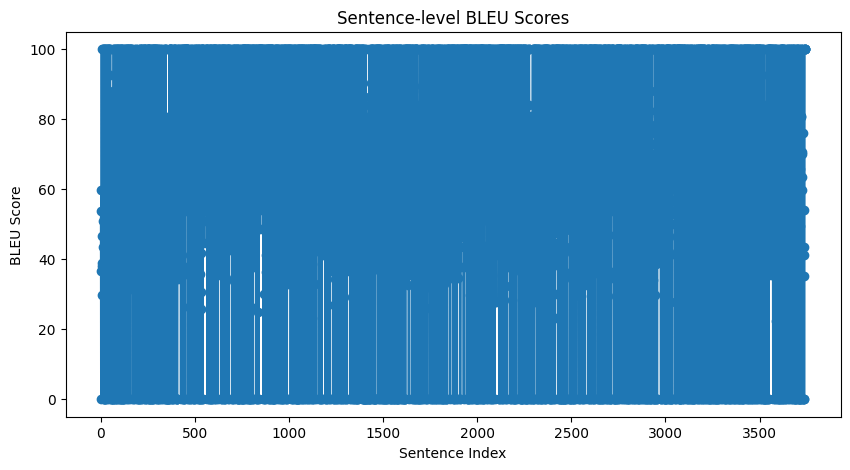

In [60]:
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu

# Calculate sentence-level BLEU scores
sentence_bleus = [
    sentence_bleu([ref.split()], pred.split()) * 100
    for pred, ref in zip(predictions, [r[0] for r in references])
]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(len(sentence_bleus)), sentence_bleus, marker='o')
plt.xlabel("Sentence Index")
plt.ylabel("BLEU Score")
plt.title("Sentence-level BLEU Scores")
plt.savefig("figures/bleu_scores.png")
plt.show()


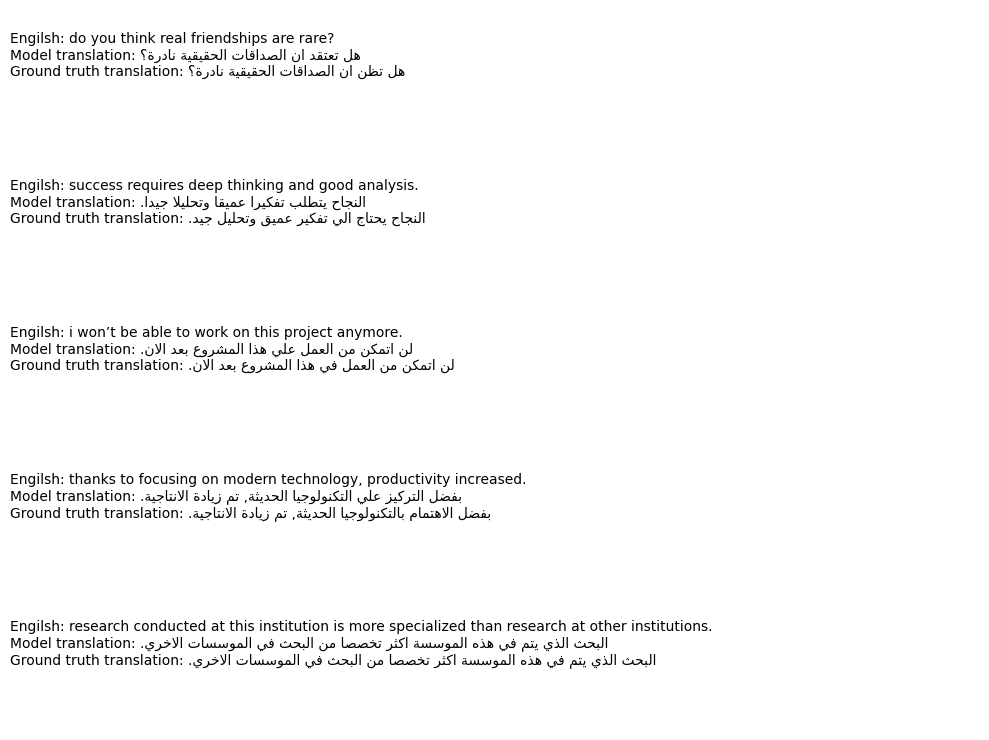

In [67]:
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

# Pick first 5 examples
num_examples = 5
fig, axs = plt.subplots(num_examples, 1, figsize=(10, num_examples*1.5))

for i in range(num_examples):
    # Reshape and reorder Arabic text
    pred_ar = get_display(arabic_reshaper.reshape(predictions[i]))
    ref_ar  = get_display(arabic_reshaper.reshape(references[i][0]))
    
    text = f"Engilsh: {test_data[i]['translation']['en']}\nModel translation: {pred_ar}\nGround truth translation: {ref_ar}"
    axs[i].text(0, 0.5, text, fontsize=10)
    axs[i].axis("off")

plt.savefig("figures/translation_examples.png")
plt.show()


c:\Users\ga.aldaej\AppData\Local\anaconda3\envs\task8\lib\site-packages\transformers\generation\utils.py:1369: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


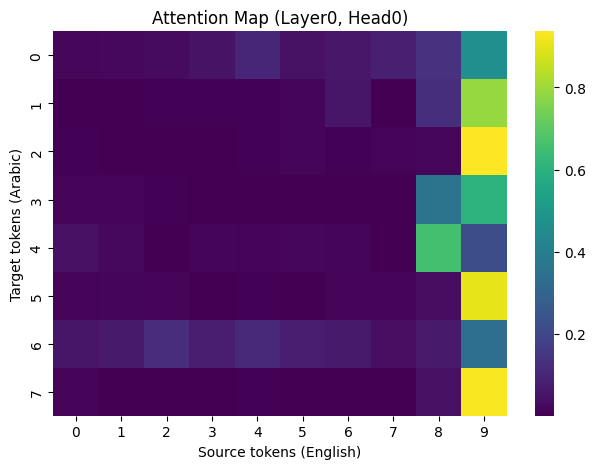

In [66]:
import seaborn as sns
import torch

example_idx = 0
inputs = tokenizer(test_data[example_idx]['translation']['en'], return_tensors='pt').to(model.device)
with torch.no_grad():
    outputs = model.generate(**inputs, output_attentions=True, return_dict_in_generate=True)


attn = outputs.cross_attentions[0][0][0].detach().cpu().numpy()  # shape: [tgt_len, src_len] if correct

# If attn is (tgt_len, 1, src_len), squeeze the middle dimension:
attn_2d = attn.squeeze()  # shape: [tgt_len, src_len]

sns.heatmap(attn_2d, cmap='viridis')
plt.xlabel("Source tokens (English)")
plt.ylabel("Target tokens (Arabic)")
plt.title("Attention Map (Layer0, Head0)")
plt.savefig("figures/attention_maps.png")
plt.show()


In [71]:
import json
import torch
from transformers import MarianMTModel, MarianTokenizer
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the best checkpoint (epoch 3)
model_dir = "opus-mt-en-ar-finetuned/checkpoint-3279"  
tokenizer = MarianTokenizer.from_pretrained(model_dir)
model = MarianMTModel.from_pretrained(model_dir).to(device)

# Load test data
with open("data/test.json", "r", encoding="utf-8") as f:
    test_data = [json.loads(line) for line in f]

en_texts = [item["translation"]["en"] for item in test_data]

# Batch translation
batch_size = 32
translated = []

for i in tqdm(range(0, len(en_texts), batch_size), desc="Translating"):
    batch_texts = en_texts[i:i+batch_size]
    inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True).to(device)
    
    with torch.no_grad():
        translated_tokens = model.generate(**inputs, max_length=128)
    
    batch_translations = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
    
    for src, pred in zip(batch_texts, batch_translations):
        translated.append({"en": src, "Model translation": pred})

# Save to JSON
with open("outputs/translated_texts.json", "w", encoding="utf-8") as f:
    json.dump(translated, f, ensure_ascii=False, indent=2)

print("Translation completed and saved to outputs/translated_texts.json")


Translating: 100%|██████████| 118/118 [01:43<00:00,  1.14it/s]

Translation completed and saved to outputs/translated_texts.json
